## Matrix multiplication

Given two matrix $m1$ and $m2$ of sizes $n * m$ and $m * k$, where the number of the column of $m1$ equals the number of rows of $m2$, we can multiply them, and we will obtain a matrix $m3$ with size $n * k$:

$$
\begin{pmatrix} 4 & 1 \\ 0 & 2 \end{pmatrix} * \begin{pmatrix} 5 \\ 3 \end{pmatrix} = \begin{pmatrix} 4*5 + 1*3 \\ 0*5 + 2*3 \end{pmatrix} = \begin{pmatrix} 23 \\ 6 \end{pmatrix}   
$$


In [15]:
import numpy as np

# Handcrafted implementation

m1 = [[4, 1], [0, 2]]
m2 = [[5], [3]]

def get_columns_number(m):
  first_row = m[0] if m else None

  if not first_row:
    return 0
  
  if not isinstance(first_row, list):
    return 1
  
  return len(first_row)


def get_rows_number(m):
  return len(m)

def multiply(m1, m2):
  cols_m1 = get_columns_number(m1)
  rows_m2 = get_rows_number(m2)

  if cols_m1 != rows_m2:
    raise Exception(f"Can't multiply: columns of m1 ({cols_m1}) != rows of m2 ({rows_m2})")

  res = [[0 for _ in range(get_columns_number(m2))] for _ in range(get_rows_number(m1))]

  for i in range(get_rows_number(m1)):
    for j in range(get_columns_number(m2)):
      for k in range(cols_m1): 
        res[i][j] += m1[i][k] * m2[k][j]

  return res

m3 = multiply(m1, m2)
print("RESULT WITH HANDCRAFTED CODE:")
print(m3)


# With Numpy

m1 = np.array(m1)
m2 = np.array(m2)
m3 = np.matmul(m1, m2)
print("\n\nRESULT WITH NUMPY:")
print(m3)


RESULT WITH HANDCRAFTED CODE:
[[23], [6]]


RESULT WITH NUMPY:
[[23]
 [ 6]]



# Linear Transformations

**def:** a *trasformation* is a function where the argument is a vector.

We usually think to a transformation as that funcion applied to every possible vector (point) in our vector space. For instance, in the Euclidian space, we can think to a transformation as a function applied to all the points in it.

**def:** a *linar trasformation* is a trasformation with these two properties:

1. The origin must remain fixed (no translations can be applied)
2. All the lines must remain straight (equally spaced lines parallel to the axis must remain parallel and equally equally spaced)

Given the definition of *standard basis* we gave in the previous chapter, we can express each point in the Euclidian space as:

$$
\vec{P} = x\hat{i} + y\hat{j}
$$

or, if we prefer:


$$
\vec{P} = \begin{pmatrix} \hat{i} & \hat{j} \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix}
$$

After we apply a linear transformation $L$, this equality remains true! 


$$
\vec{P} = \begin{pmatrix} L(\hat{i}) & L(\hat{j}) \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix}
$$

In other words, if we apply a transformation such as:

$$
\begin{pmatrix} 1 \\ 0 \end{pmatrix} => \begin{pmatrix} 3 \\ -2 \end{pmatrix}
$$

and

$$
\begin{pmatrix} 0 \\ 1 \end{pmatrix} => \begin{pmatrix} 2 \\ 1 \end{pmatrix}
$$

Then, the point have the coordinates:

$$
\vec{P} = \begin{pmatrix} L(\hat{i}) & L(\hat{j}) \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 3 & -2 \\ 2 & 1 \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix}
$$

In the Euclidian space, we can represent each linear transformation with a $2 * 2$ matrix. For Instance, the 90 degree rotation counterclockwise, can be representet with the following matrix:

$$
\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} 
$$

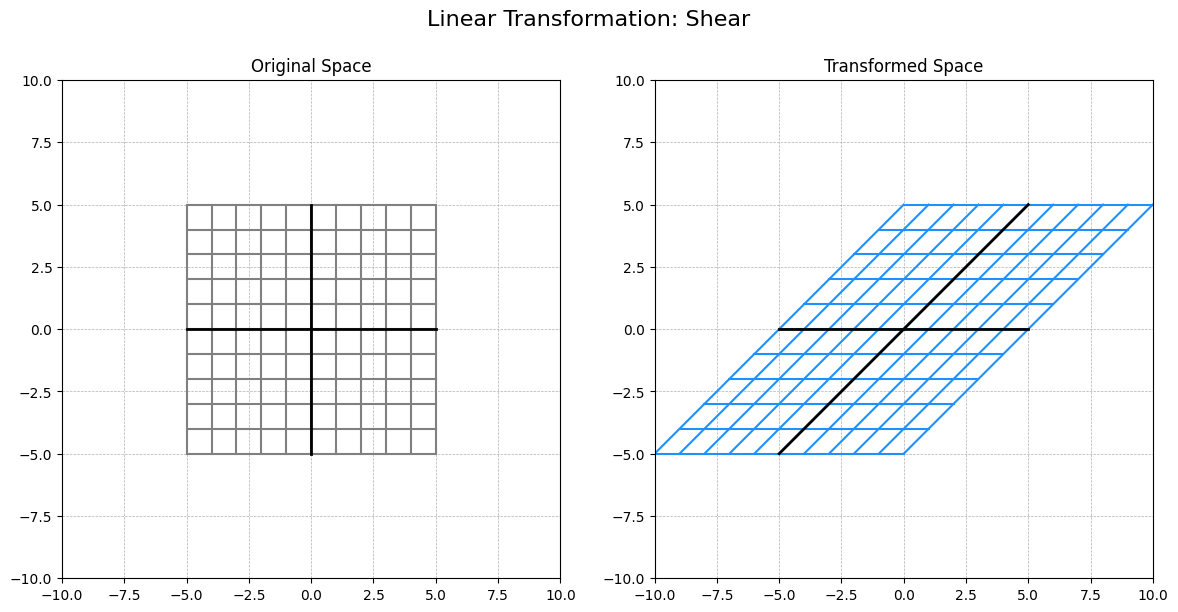

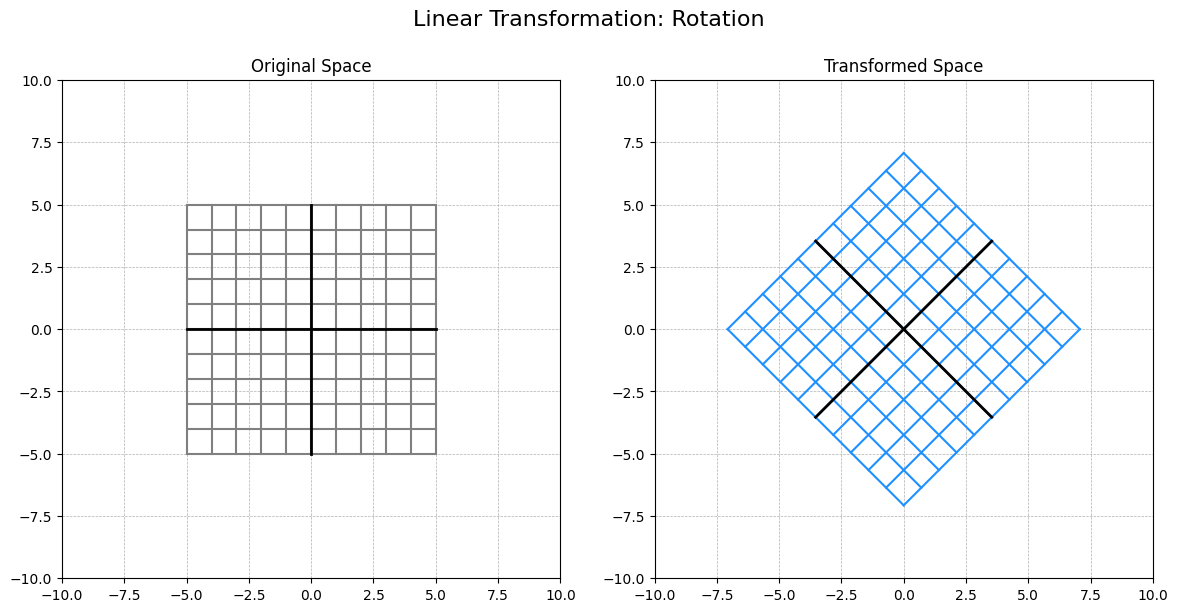

In [2]:
import matplotlib.pyplot as plt

def plot_grid(ax, grid, color='gray', linestyle='-'):
    """Plots a 2D grid of points connected by lines."""
    # Plot vertical lines
    for i in range(grid.shape[1]):
        ax.plot(grid[0, i, :], grid[1, i, :], color=color, linestyle=linestyle)
    # Plot horizontal lines
    for i in range(grid.shape[2]):
        ax.plot(grid[0, :, i], grid[1, :, i], color=color, linestyle=linestyle)

def visualize_transformation(transformation_matrix, title):
    """
    Visualizes the effect of a linear transformation on a 2D grid.

    Args:
        transformation_matrix (np.ndarray): A 2x2 matrix representing the linear transformation.
        title (str): The title for the plot.
    """
    # Define the original grid of points
    x = np.linspace(-5, 5, 11)
    y = np.linspace(-5, 5, 11)
    xx, yy = np.meshgrid(x, y)
    original_grid = np.array([xx, yy])

    # Apply the linear transformation to each point on the grid
    # We reshape the grid to a list of 2D points, apply the matrix multiplication,
    # and then reshape it back to the original grid structure.
    points = original_grid.reshape(2, -1)
    transformed_points = transformation_matrix @ points
    transformed_grid = transformed_points.reshape(original_grid.shape)

    # --- Plotting ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)

    # Plot Original Grid
    ax1.set_title("Original Space")
    plot_grid(ax1, original_grid, color='gray')
    # Highlight the axes
    ax1.plot([-5, 5], [0, 0], 'k-', lw=2) # x-axis
    ax1.plot([0, 0], [-5, 5], 'k-', lw=2) # y-axis
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)
    ax1.set_aspect('equal', adjustable='box')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot Transformed Grid
    ax2.set_title("Transformed Space")
    plot_grid(ax2, transformed_grid, color='dodgerblue')
    # Highlight the transformed axes
    transformed_x_axis = transformation_matrix @ np.array([[-5, 5], [0, 0]])
    transformed_y_axis = transformation_matrix @ np.array([[0, 0], [-5, 5]])
    ax2.plot(transformed_x_axis[0], transformed_x_axis[1], 'k-', lw=2)
    ax2.plot(transformed_y_axis[0], transformed_y_axis[1], 'k-', lw=2)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)
    ax2.set_aspect('equal', adjustable='box')
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Example 1: Shear Transformation ---
# This transformation slants the grid.
shear_matrix = np.array([
    [1, 1],
    [0, 1]
])
visualize_transformation(shear_matrix, "Linear Transformation: Shear")


# --- Example 2: Rotation Transformation ---
# This transformation rotates the grid by 45 degrees counter-clockwise.
angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle),  np.cos(angle)]
])
visualize_transformation(rotation_matrix, "Linear Transformation: Rotation")


If the transformation is such that $L(\hat{i})$ and $L(\hat{j})$ will become linearly dependant, then the linear transformation squishes all the Euclidian space onto the line where $L(\hat{i})$ and $L(\hat{j})$ sit.

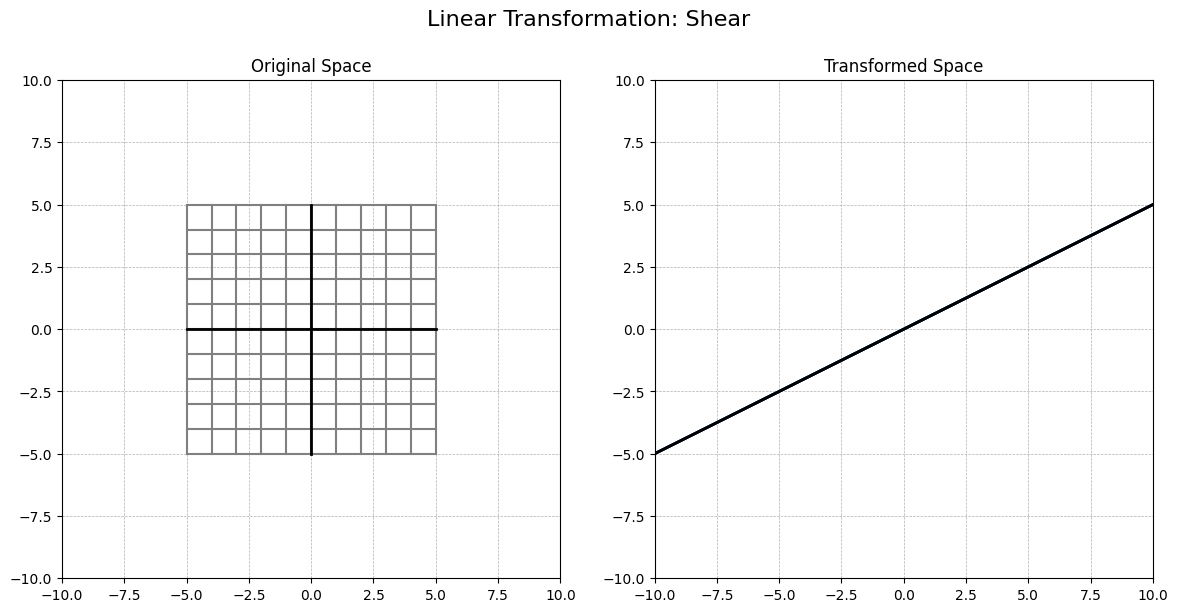

In [16]:
shear_matrix = np.array([
    [2, -2],
    [1, -1]
])
visualize_transformation(shear_matrix, "Linear Transformation: Shear")